<a href="https://colab.research.google.com/github/WahyuKhairi06/TextMining_WahyuKhairi_2311531009/blob/main/Pertemuan%2012/TextMining_Kel3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEXT MINING**

SCRAPING DATA TOKPED, TOKO : ASUS INDONESIA OFFICIAL. 200 HALAMAN REVIEW DARI 995 HALAMAN. DATA YANG DIAMBIL NAMA PRODUCT, NAMA, RATING, DAN ULASAN

KODE DIBAWAH HANYA BISA DIJALANKAN DARI VSCODE, JADI KALAU INGIN MENJALANKAN COPY KE VSCODE, ATUR LINK TOKPED, DAN JUMLAH HALAMAN YANG INGIN DI SCRAPING

In [ ]:
# from bs4 import BeautifulSoup
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# import time
# import pandas as pd

# url = input("Masukkan url toko : ")

# if url:
#     options = webdriver.ChromeOptions()
#     options.add_argument("--start-maximized")
#     driver = webdriver.Chrome(options=options)
#     driver.get(url)

#     data = []
#     for i in range(0, 200): # jumlah halaman yang diambil

#         soup = BeautifulSoup(driver.page_source, "html.parser")
#         containers = soup.find_all("article", attrs={"class": "css-1pr2lii"})

#         for container in containers:
#             try:
#                 # Ambil nama produk
#                 title_tag = container.find("p", class_="css-akhxpb-unf-heading")
#                 title = title_tag.text.strip() if title_tag else "Tidak ditemukan"

#                 rating_div = container.find("div", attrs={"data-testid": "icnStarRating"})
#                 rating = rating_div["aria-label"] if rating_div else "Tidak ada rating"

#                 date_tag = container.find("p", class_="css-1rpz5os-unf-heading")
#                 date = date_tag.text.strip() if date_tag else "Tidak ada tanggal"

#                 # Ambil ulasan
#                 review_tag = container.find("span", attrs={"data-testid": "lblItemUlasan"})
#                 review = review_tag.text.strip() if review_tag else "Tidak ditemukan"



#                 data.append((title, rating, date, review))

#             except Exception:
#                 continue

#         time.sleep(2)
#         driver.find_element(By.CSS_SELECTOR, "button[aria-label^='Laman berikutnya']").click()
#         time.sleep(3)

#     df = pd.DataFrame(data, columns=["Nama Produk", "Rating", "Tanggal", "Ulasan"])
#     df.to_csv("Tokopedia.csv", index=False)

#     print("Selesai! Data tersimpan.")


# ============================================================
# IMPORT LIBRARY
# ============================================================

In [ ]:
# Menginstall library Sastrawi untuk stemming bahasa Indonesia
!pip install sastrawi
# Menginstall library gensim untuk pemodelan LDA dan manajemen corpus / dictionary
!pip install gensim
# Menginstall library emoji untuk mendeteksi dan menghapus emoji pada teks
!pip install emoji

import pandas as pd# Import library pandas untuk membaca & mengolah dataset (CSV, DataFrame)
import numpy as np# Import library numpy untuk operasi numerik / array (opsional untuk text mining)
import re# Import library re untuk regular expression (membersihkan teks)
import string# Import library string (membantu dalam manipulasi karakter)
import emoji# Import library emoji untuk mendeteksi / menghilangkan emoji

# Import library Sastrawi untuk stemming bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Import stopword remover Sastrawi untuk menghapus kata-kata umum yang tidak bermakna konteks
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Import library gensim (framework utama untuk topic modeling)
import gensim
# Import corpora dari gensim untuk membentuk dictionary dan corpus sebelum LDA
from gensim import corpora


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.7 MB/s eta 0:00:00


# ============================================================
# LOAD DATASET
# ============================================================

In [ ]:
# Mendefinisikan URL yang berisi dataset Tokopedia dalam format CSV
url = "https://raw.githubusercontent.com/ReynardGhazyTsaqif/KumpulanDataset/refs/heads/main/Tokopedia.csv"

# Membaca dataset CSV langsung dari URL dan menyimpannya ke dalam DataFrame pandas
df = pd.read_csv(url)
# Menampilkan data baris-baris awal (preview) untuk memastikan dataset berhasil terbaca
print("Preview Data:")
display(df.head())

# Menampilkan informasi struktur dataset:

# jumlah kolom, tipe data tiap kolom, total non-null, ukuran memori, dll.
print("\nInformasi Struktur Dataset:")
print(df.info())
# Menampilkan jumlah total baris data dalam dataset
print("\nJumlah Data:", len(df))


Preview Data:


,Nama Produk,Rating,Tanggal,Ulasan
0,Tidak ditemukan,bintang 5,Hari ini,"kualitas barang ok, diskon mantap"
1,[FREE TWS] ASUS TUF Gaming A15 FA506NCG-R735B1...,bintang 5,1 hari lalu,"Pengiriman cepat, barang sesuai spesifikasi, p..."
2,[FREE SMARTWATCH] ASUS Vivobook 14 A1405VA-VIP...,bintang 5,2 hari lalu,"Setelah dicoba ternyata resoonsif banget, load..."
3,[FREE SMARTWATCH] ASUS Vivobook 14 A1405VA-VIP...,bintang 5,2 hari lalu,barang sampai dengan amann
4,ASUS Vivobook Go 15 E1504FA-VIPS3151M - Mixed ...,bintang 5,3 hari lalu,psanan tba ssuai pking rpih mlus dn NB nya jga...



Informasi Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nama Produk  2000 non-null   object
 1   Rating       2000 non-null   object
 2   Tanggal      2000 non-null   object
 3   Ulasan       2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB
None

Jumlah Data: 2000


In [ ]:
print(df.shape)        # jumlah baris & kolom
print(df.columns)      # nama kolom

(2000, 4)
Index(['Nama Produk', 'Rating', 'Tanggal', 'Ulasan'], dtype='object')


In [ ]:
# Hanya ambil kolom yang dipakai
df = df[['Nama Produk', 'Ulasan']]

# Hapus missing & duplikat
df = df.dropna(subset=['Ulasan'])
df = df.drop_duplicates(subset=['Nama Produk', 'Ulasan']).reset_index(drop=True)

print("Total data setelah bersih:", len(df))
display(df.head())

Total data setelah bersih: 1829


,Nama Produk,Ulasan
0,Tidak ditemukan,"kualitas barang ok, diskon mantap"
1,[FREE TWS] ASUS TUF Gaming A15 FA506NCG-R735B1...,"Pengiriman cepat, barang sesuai spesifikasi, p..."
2,[FREE SMARTWATCH] ASUS Vivobook 14 A1405VA-VIP...,"Setelah dicoba ternyata resoonsif banget, load..."
3,[FREE SMARTWATCH] ASUS Vivobook 14 A1405VA-VIP...,barang sampai dengan amann
4,ASUS Vivobook Go 15 E1504FA-VIPS3151M - Mixed ...,psanan tba ssuai pking rpih mlus dn NB nya jga...


In [ ]:
df.isnull().sum()

,0
Nama Produk,0
Rating,0
Tanggal,0
Ulasan,0


NAMA PRODUK SEBAGIAN BESAR TIDAK BISA DI SCRAPING DARI TOKPED, HANYA ULASAN YANG BISA, SEHINGGA NAMA PORDUK MENJADI "TIDAK DITEMUKAN"

In [ ]:
jumlah_tidak_ditemukan = (df['Nama Produk'] == "Tidak ditemukan").sum()
print("Jumlah review tanpa nama produk:", jumlah_tidak_ditemukan)

Jumlah review tanpa nama produk: 1681


# ============================================================
# TEXT PREPROCESSING
# ============================================================

In [ ]:
def clean_text(text):

    text = text.lower()

    # Hapus URL
    text = re.sub(r"http\S+|www.\S+", "", text)

    # Hapus HTML tag
    text = re.sub(r"<.*?>", "", text)

    # Hapus emoji
    text = emoji.replace_emoji(text, replace="")

    # Hapus angka
    text = re.sub(r"\d+", "", text)

    # Hapus repeated letters "baguuuuus" → "bagus"
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Hapus punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Hapus spasi berlebihan
    text = re.sub(r"\s+", " ", text).strip()

    return text

df['clean_text'] = df['Ulasan'].astype(str).apply(clean_text)


In [ ]:
# Membuat fungsi bernama 'tokenize' untuk memecah teks menjadi daftar kata (tokens)
# Fungsi ini memisahkan kata menggunakan spasi sebagai delimiter
def tokenize(text):
    return text.split()

# Menerapkan fungsi 'tokenize' pada kolom 'clean_text' untuk setiap baris dataset
# Hasil tokenisasi disimpan ke kolom baru bernama 'tokens'
df['tokens'] = df['clean_text'].apply(tokenize)


In [ ]:
# Membuat objek StopWordRemoverFactory dari Sastrawi untuk mendapatkan daftar stopword dasar bahasa Indonesia
stop_factory = StopWordRemoverFactory()

# Mengambil daftar stopword default dari Sastrawi dan mengubahnya menjadi tipe 'set' agar pengecekan lebih cepat
stopwords = set(stop_factory.get_stop_words())

# Menambahkan stopword tambahan khusus untuk konteks review e-commerce
# Tujuan: menghapus kata-kata umum / informal / ekspresif yang tidak membantu dalam pembentukan topik LDA
extra_stopwords = {
    "nya", "nih", "dong", "sih", "ga", "gak", "kok", "ya", "iyaa", "lho",
    "haha", "hehe", "wkwk", "oke", "ok", "sip", "banget", "bgt",
    "aku", "kamu", "dia", "kami", "kita", "saya",
    "barang", "produk", "pesanan", "toko", "seller", "blm", "udh", "udah","dan","juga"
}

# Menggabungkan daftar stopword tambahan ke daftar stopword utama
stopwords.update(extra_stopwords)

# Membuat fungsi untuk menghapus stopword dari token
# - hanya mempertahankan token yang tidak ada di dalam stopwords
# - serta memastikan panjang token minimal > 2 huruf (untuk menghapus token sangat pendek seperti "ke", "di", "hp")
def remove_stopwords(tokens):
    return [t for t in tokens if t not in stopwords and len(t) > 2]

# Menerapkan fungsi remove_stopwords ke kolom 'tokens' untuk seluruh dataset
# Hasil pemrosesan menggantikan isi kolom 'tokens' yang lama
df['tokens'] = df['tokens'].apply(remove_stopwords)


In [ ]:
# Membuat dictionary (kamus) berisi kata-kata slang / typo / singkatan yang sering muncul dalam ulasan
# Format: "kata_slang": "kata_normal"
slang_dict = {
    "bgs":"bagus",
    "bgus":"bagus",
    "bgsnya":"bagus",
    "mantappp":"mantap",
    "mantapp":"mantap",
    "mantabb":"mantap",
    "rekomen":"rekomendasi",
    "rekom":"rekomendasi",
    "rekomened":"rekomendasi",
    "mlus":"mulus",
    "mlusnya":"mulus",
    "hlus":"mulus",
    "lus":"mulus",
    "psanan":"pesanan",
    "tba":"tiba",
    "bntu":"bantu",
    "krm":"kirim",
    "ksh":"kasih",
    "bgt":"banget",
    "seger":"segar",
    "pking":"paking",
    "rpih":"rapi"
}
# Membuat fungsi untuk mengganti kata slang/typo berdasarkan kamus slang_dict
# Jika token ditemukan dalam slang_dict → token diganti dengan versi normalnya
# Jika tidak ditemukan → token tetap
def normalize_slang(tokens):
    return [slang_dict.get(t, t) for t in tokens]

# Menerapkan fungsi normalize_slang pada seluruh kolom 'tokens'
# sehingga semua token slang diseragamkan menjadi bentuk baku
df['tokens'] = df['tokens'].apply(normalize_slang)


In [ ]:
# Membuat objek factory untuk stemming bahasa Indonesia menggunakan library Sastrawi
stem_factory = StemmerFactory()

# Membuat objek stemmer dari factory yang akan digunakan untuk mengubah kata ke bentuk dasarnya (root word)
stemmer = stem_factory.create_stemmer()

# Membuat fungsi bernama 'stemming' untuk melakukan proses stemming pada daftar token
# Setiap token diubah ke bentuk dasar menggunakan stemmer.stem()
def stemming(tokens):
    return [stemmer.stem(t) for t in tokens]

# Menerapkan fungsi stemming pada seluruh kolom 'tokens'
# Hasil stemming menggantikan isi kolom 'tokens' sehingga semua kata kini dalam bentuk dasar
df['tokens'] = df['tokens'].apply(stemming)


In [ ]:
# Menghapus token yang panjangnya kurang dari atau sama dengan 2 huruf
# Tujuan: menghilangkan token sangat pendek seperti "ke", "di", "hp", "ok", dll. karena tidak membantu pembentukan topik
df['tokens'] = df['tokens'].apply(lambda x: [t for t in x if len(t) > 2])

# Menghapus baris (review) yang tidak memiliki token setelah proses pembersihan
# Hanya menyimpan review dengan minimal 1 token agar tetap relevan untuk proses LDA
# reset_index(drop=True) digunakan untuk menata ulang index agar kembali berurutan
df = df[df['tokens'].map(len) > 0].reset_index(drop=True)


In [ ]:
# Membuat dictionary (kamus) dari seluruh token yang ada pada dataset
# Setiap kata unik (token) akan mendapatkan ID numerik
dictionary = corpora.Dictionary(df['tokens'])

# Menyaring vocabulary untuk menghapus kata yang terlalu jarang atau terlalu sering muncul
# no_below=3  → hanya menyimpan token yang muncul minimal di 3 dokumen
# no_above=0.5 → menghapus token yang muncul di lebih dari 50% dokumen (kata terlalu umum → tidak spesifik untuk topik)
dictionary.filter_extremes(no_below=3, no_above=0.5)

# Mengonversi setiap dokumen ke format Bag-of-Words (BoW)
# Format BoW = [(id_kata, jumlah_kemunculan), ...] → siap untuk dimodelkan dengan LDA
corpus = [dictionary.doc2bow(t) for t in df['tokens']]

# Menampilkan total jumlah dokumen dalam corpus
print("Total Dokumen:", len(corpus))
# Menampilkan total vocabulary yang tersisa setelah filtering
print("Total Vocabulary:", len(dictionary))

# Menampilkan 20 baris pertama untuk memastikan token & metadata dokumen tersimpan dengan benar
df[['Nama Produk', 'Ulasan', 'tokens']].head(20)



Total Dokumen: 1967
Total Vocabulary: 593


,Nama Produk,Ulasan,tokens
0,Tidak ditemukan,"kualitas barang ok, diskon mantap","[kualitas, diskon, mantap]"
1,[FREE TWS] ASUS TUF Gaming A15 FA506NCG-R735B1...,"Pengiriman cepat, barang sesuai spesifikasi, p...","[kirim, cepat, sesuai, spesifikasi, packingan,..."
2,[FREE SMARTWATCH] ASUS Vivobook 14 A1405VA-VIP...,"Setelah dicoba ternyata resoonsif banget, load...","[coba, nyata, resoonsif, loading, cepat, kalau..."
3,[FREE SMARTWATCH] ASUS Vivobook 14 A1405VA-VIP...,barang sampai dengan amann,[amann]
4,ASUS Vivobook Go 15 E1504FA-VIPS3151M - Mixed ...,psanan tba ssuai pking rpih mlus dn NB nya jga...,"[pesan, tiba, ssuai, paking, rapi, mulus, jga,..."
5,[FREE SMARTWATCH] ASUS Vivobook 14 A1405VA-VIP...,Aman sampai tujuann,"[aman, tujuann]"
6,ASUS Vivobook 14 A1404VA-FHD3821M - Quiet Blue...,"Packing mantap, barang aman, lisensi OS dan of...","[packing, mantap, aman, lisensi, office, inclu..."
7,Tidak ditemukan,packing mantap,"[packing, mantap]"
8,[FREE MOUSE] ASUS Vivobook 14 A1404ZA-VIPS551 ...,"alhamdulillah udah bisa kerja lg, tiba cepat d...","[alhamdulillah, kerja, tiba, cepat, mulus, ses..."
9,[FREE MOUSE] ASUS Vivobook Go 15 E1504FA-VIPS5...,Pengiriman sangat cepat dan barang diterima de...,"[kirim, sangat, cepat, terima, baik, sangat, b..."


# LDA

LDA Topic Modeling

In [ ]:
from gensim.models import LdaModel, CoherenceModel

scores = []

print("Menghitung Coherence Score...")

for k in range(2, 9):  # coba 2–8 topik
    lda_test = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        passes=15,
        random_state=42
    )

    coherence = CoherenceModel(
        model=lda_test,
        texts=df["tokens"],
        dictionary=dictionary,
        coherence='c_v'
    ).get_coherence()

    scores.append((k, coherence))
    print(f"K = {k} | Coherence = {coherence:.4f}")

Menghitung Coherence Score...
K = 2 | Coherence = 0.4792
K = 3 | Coherence = 0.3942
K = 4 | Coherence = 0.3871
K = 5 | Coherence = 0.3433
K = 6 | Coherence = 0.3516
K = 7 | Coherence = 0.3549
K = 8 | Coherence = 0.3836


Train LDA Final

In [ ]:
K = 6

lda_final = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=K,
    passes=20,
    random_state=42
)

Tampilkan Kata-Kata di Setiap Topik

In [ ]:
topics = lda_final.print_topics(num_words=12)
for topic in topics:
    print(topic)

(0, '0.062*"moga" + 0.060*"awet" + 0.046*"laptop" + 0.029*"keren" + 0.028*"aman" + 0.025*"baik" + 0.021*"thanks" + 0.021*"alhamdulillah" + 0.017*"selamat" + 0.016*"asus" + 0.014*"lengkap" + 0.013*"dapet"')
(1, '0.099*"aman" + 0.043*"packing" + 0.032*"kirim" + 0.029*"cepat" + 0.023*"packaging" + 0.020*"terima" + 0.019*"baik" + 0.018*"sangat" + 0.017*"keren" + 0.016*"rapi" + 0.016*"laptop" + 0.015*"kasih"')
(2, '0.168*"sesuai" + 0.063*"deskripsi" + 0.043*"temu" + 0.027*"mantap" + 0.026*"respon" + 0.021*"fast" + 0.019*"sangat" + 0.016*"mantab" + 0.013*"ori" + 0.013*"bonus" + 0.013*"puas" + 0.012*"datang"')
(3, '0.105*"bagus" + 0.093*"baik" + 0.048*"fungsi" + 0.035*"sangat" + 0.025*"kualitas" + 0.020*"barang" + 0.020*"terimakasih" + 0.017*"mantap" + 0.014*"performa" + 0.014*"kerja" + 0.013*"sekali" + 0.013*"original"')
(4, '0.068*"mantap" + 0.043*"beli" + 0.035*"laptop" + 0.035*"kirim" + 0.019*"cepat" + 0.018*"asus" + 0.016*"buat" + 0.015*"official" + 0.014*"lama" + 0.013*"kali" + 0.013*"l

install package untuk visualisasi pyldavis

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 94.2 MB/s eta 0:00:00


Visualisasi Topic Modeling (pyLDAvis)

In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_final, corpus, dictionary)
vis

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.054646 -0.101383       1        1  20.000287
3      0.191663  0.073992       2        1  18.811915
2      0.031460 -0.076967       3        1  17.231551
4      0.115715 -0.030700       4        1  17.197352
0     -0.123797  0.216259       5        1  14.909603
5     -0.160395 -0.081201       6        1  11.849291, topic_info=         Term        Freq       Total Category  logprob  loglift
29       baik  303.000000  303.000000  Default  30.0000  30.0000
42       moga  153.000000  153.000000  Default  29.0000  29.0000
4        awet  140.000000  140.000000  Default  28.0000  28.0000
39     terima  207.000000  207.000000  Default  27.0000  27.0000
6       kirim  369.000000  369.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
99     ringan   11.417380   35.477078   Topic6  -4.8374   0.9992
46      bagus   21.575531  336.767753   Topic6  -4.2010  -0.6149
115    respon   15.827584  170.480256   Topic6  -4.5108  -0.2440
31    packing   14.125035  182.428308   Topic6  -4.6246  -0.4255
1    kualitas   11.338840   93.653872   Topic6  -4.8443   0.0215

[380 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
186       5  0.786974  aamiin
114       1  0.017997   admin
114       2  0.269952   admin
114       3  0.044992   admin
114       4  0.593894   admin
...     ...       ...     ...
172       1  0.734825    wrap
172       3  0.244942    wrap
461       2  0.094672     you
461       4  0.757373     you
461       6  0.094672     you

[656 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 5, 1, 6])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


menggunakan visualisasi wordcloud

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

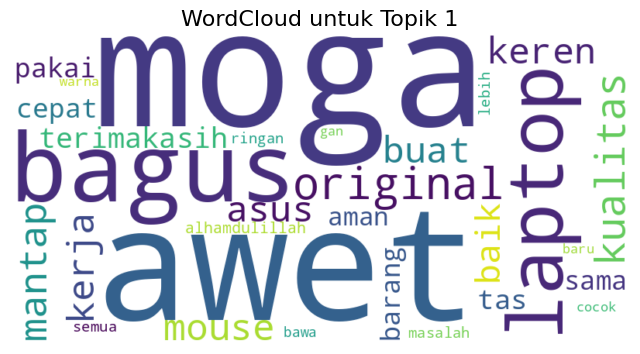

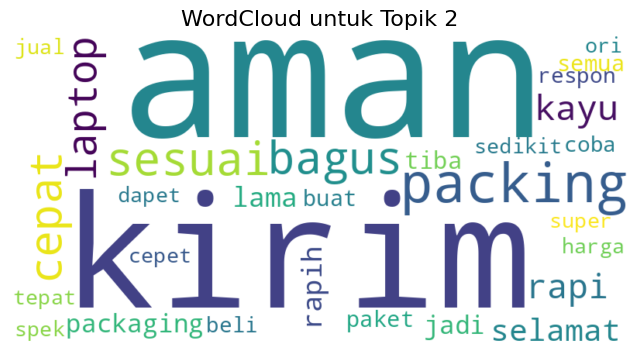

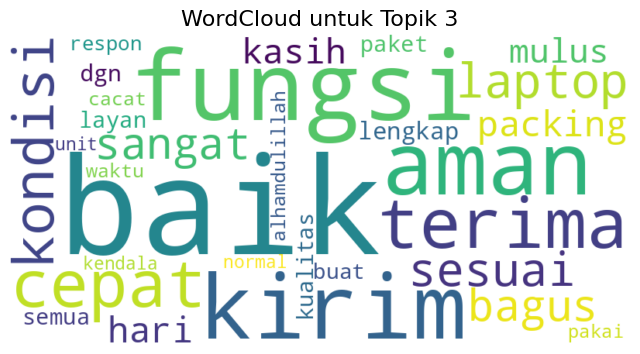

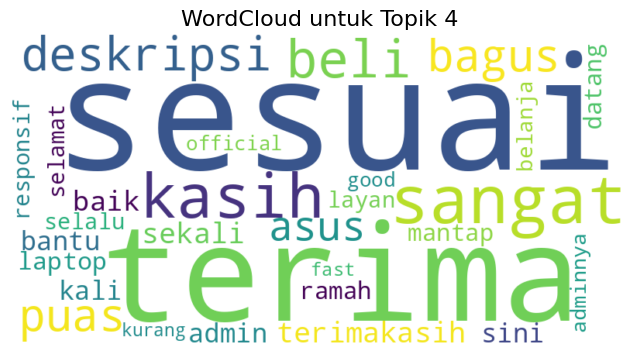

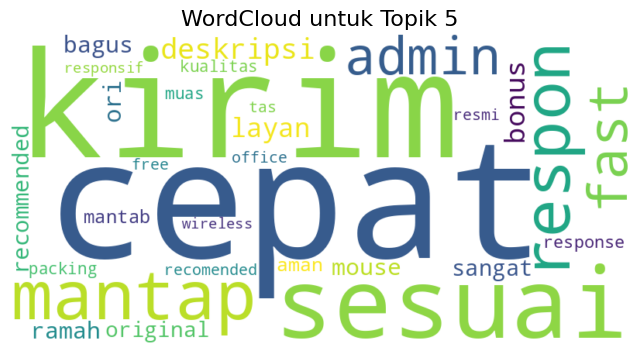

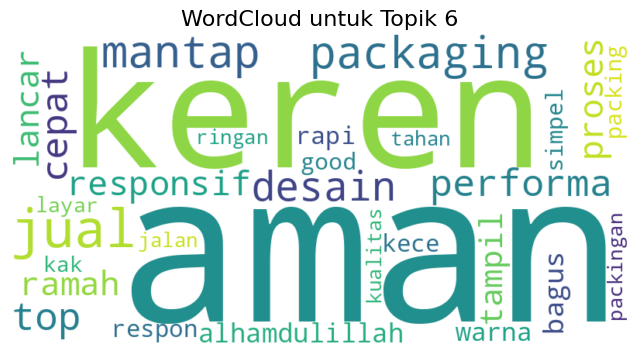

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# WordCloud per topik
for t in range(lda_final.num_topics):
    plt.figure(figsize=(8, 5))

    # Ambil kata dan bobot dari topik
    words = dict(lda_final.show_topic(t, 30))  # 30 kata teratas

    # Generate wordcloud
    wordcloud = WordCloud(width=800,
                          height=400,
                          background_color='white').generate_from_frequencies(words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud untuk Topik {t+1}", fontsize=16)
    plt.show()
    print("\n\n")
